# **Reuters dataset**

La base de datos Reuters, se compone de 11,228 cables de noticias, los cuales pueden pertenecer a uno de 46 temas. Esta base de datos viene precargada en Keras:

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


El argumento num_words=10000 indica que sólo se tomarán en cuenta las 10,000 palabras más frecuentes de la base de datos, esto con la finalidad de reducir el tamaño de los vectores de entrada.

In [2]:
train_data[101] #Noticia 101 del conjunto de entrenamiento

[1,
 2,
 149,
 8,
 25,
 2,
 400,
 304,
 200,
 6,
 337,
 4,
 342,
 2773,
 2134,
 7,
 6439,
 3689,
 9,
 4,
 342,
 643,
 2134,
 7,
 6002,
 4,
 88,
 1347,
 31,
 4,
 384,
 292,
 211,
 5,
 2,
 978,
 220,
 33,
 851,
 2178,
 11,
 15,
 9,
 447,
 7,
 42,
 92,
 131,
 276,
 5,
 156,
 11,
 15,
 50,
 33,
 30,
 1285,
 7,
 2,
 383,
 29,
 336,
 25,
 383,
 29,
 2088,
 94,
 156,
 4,
 49,
 8,
 7,
 788,
 4,
 88,
 33,
 1046,
 747,
 11,
 15,
 197,
 92,
 222,
 825,
 5,
 934,
 11,
 15,
 2,
 8,
 17,
 12]

In [3]:
len(train_data[101]) #Número de palabras en la crítica 101 del conjunto de entrenamiento

92

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [7]:
train_labels[701] #La crítica 101 del conjunto de entrenamiento pertenece al tema 12.

12

In [8]:
train_data.shape

(8982,)

Cada una de las instancias de la base de datos Reuters puede decodificarse fácilmente:

In [9]:
#word_index es un diccionario que permite mapear cada palabra a su respectivo índice
word_index = reuters.get_word_index()
# Aplicamos la operación inversa, es decir, mapeamos de índices a palabras.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Procedemos a decodificar la crítica. La razón por la que a cada índice le restamos 3, es
#porque 0, 1 y 2 son índices reservados para los valores de "padding", "comienzo de la secuencia" y "desconocido".
# El argumento "?" se regresa en caso de que el índice en cuestión no tenga ninguna palabra asociada.
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[7673]])

557056/550378 [==============================] - 0s 0us/step


In [10]:
decoded_newswire

'? lt nippon telegraph and telephone corp ntt expects its profits to fall to 328 billion yen in the year ending march 31 1988 from a projected 348 billion this year the company said total sales for the same period are expected to rise to 5 506 billion yen from a projected 5 328 billion this year ntt said in a business operations plan submitted to the post and telecommunications ministry ntt said it plans to make capital investments of 1 770 billion yen in 1987 88 including 109 billion for research and development as against a total of 1 600 billion this year an ntt spokesman said increased competition from new ? to the telecommunications field and the effect of a sales tax scheduled to be introduced next january were the major factors behind the projected decrease in profits the japanese telecommunications industry was ? in 1985 reuter 3'

# **Preprocesamiento de los datos**

Aplicamos el enfoque de one-hot encoding a los datos de entrada. Por ejemplo, si una de nuestras instancias se representa por la lista [2, 7, 15], al aplicar one-hot encoding, dicha lista se convertirá en un vector de 10,000 elementos, donde a los índices 2, 7 y 15, se les asignará el valor de 1. La razón por la que se aplica esta operación en los datos de entrada, es porque las redes neuronales convolucionales no reciben como entrada listas de valores, sino tensores. <br>
**Noticia 1 -> [2, 7, 15]** <br>
**One-hot encoding de la crítica -> [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ... , 0]** <br>
**Noticia 2-> [9, 7, 1, 2, 7]** <br>
**One-hot encoding de la crítica -> [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ... , 0]**

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Creamos matrices de ceros con dimensiones (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): #i = 0
        results[i, sequence] = 1.  # le asignamos el valor de uno al índice correspondiente
    return results

# Conjunto de entrenamiento vectorizado
x_train = vectorize_sequences(train_data)
# Conjunto de prueba vectorizado
x_test = vectorize_sequences(test_data)

In [12]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Asimismo, aplicamos one-hot encoding a las etiquetas de los conjuntos de entrenamiento y prueba. Esto genera que cada etiqueta se convierta en un vector de 0's de 46 dimensiones, con un 1 asignado al índice asociado a la etiqueta.

In [15]:
# Funcion manual
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Etiquetas de entrenamiento vectorizadas
one_hot_train_labels = to_one_hot(train_labels)
# Etiquetas de prueba vectorizadas
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
one_hot_train_labels[400]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Keras posee una función que permite realizar one-hot encoding de forma automática:

In [17]:
# Función automatica
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
one_hot_train_labels[400]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **Construcción de la red neuronal**

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# **Compilación**

In [20]:
model.compile(optimizer='rmsprop',# lr=1e-4    #Forma parte del entrenamiento
              loss='categorical_crossentropy',  #Forma parte del entrenamiento -> loss / error
              metrics=['accuracy'])       #NO forma parte del entrenamiento

# **Validación**

Buscando evaluar el rendimiento del modelo durante la fase de entrenamiento, construimos el conjunto de validación a partir del conjunto de entrenamiento.

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
#Conjunto de validación
len(x_val)

1000

In [23]:
#Conjunto de train
len(partial_x_train)

7982

# **Entrenamiento**

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 57ms/step - loss: 2.5779 - accuracy: 0.5152 - val_loss: 1.7237 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.4223 - accuracy: 0.6944 - val_loss: 1.3402 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0607 - accuracy: 0.7709 - val_loss: 1.1365 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8386 - accuracy: 0.8231 - val_loss: 1.0440 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6687 - accuracy: 0.8609 - val_loss: 0.9965 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5370 - accuracy: 0.8894 - val_loss: 0.9368 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4334 - accuracy: 0.9097 - val_loss: 0.9240 - val_accuracy: 0.8140
Epoch 8/20
16

# **Curva de pérdida**

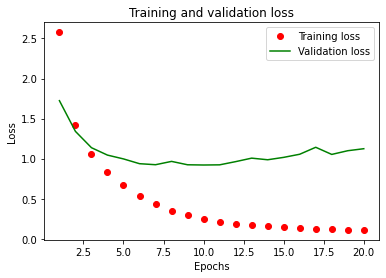

In [25]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Curva de precisión**

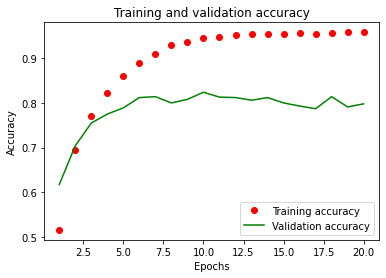

In [26]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Con base a las gráficas previas, podemos observar que, aproximadamente a partir de la época 10, el modelo deja de mejorar y comienza a presentarse una disminución en su rendimiento.

# **Re-entrenamiento y evaluación del modelo final**

Una vez que se seleccionó el modelo tomando como base el rendimiento de este en el conjunto de validación, una práctica recomendada es volver a entrar la arquitectura con los mismos parámetros con los que se generó el modelo seleccionado y con el conjunto de entrenamiento original, es decir, integrado el conjunto de validación al conjunto de entrenamiento "parcial". 

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Entrenamos el modelo en el conjunto de entrenamiento original
model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 41ms/step - loss: 2.5043 - accuracy: 0.4963
Epoch 2/9
18/18 [==============================] - 1s 41ms/step - loss: 1.3645 - accuracy: 0.7101
Epoch 3/9
18/18 [==============================] - 1s 41ms/step - loss: 1.0146 - accuracy: 0.7803
Epoch 4/9
18/18 [==============================] - 1s 41ms/step - loss: 0.7964 - accuracy: 0.8303
Epoch 5/9
18/18 [==============================] - 1s 41ms/step - loss: 0.6317 - accuracy: 0.8647
Epoch 6/9
18/18 [==============================] - 1s 41ms/step - loss: 0.5012 - accuracy: 0.8913
Epoch 7/9
18/18 [==============================] - 1s 40ms/step - loss: 0.4020 - accuracy: 0.9147
Epoch 8/9
18/18 [==============================] - 1s 41ms/step - loss: 0.3299 - accuracy: 0.9267
Epoch 9/9
18/18 [==============================] - 1s 39ms/step - loss: 0.2734 - accuracy: 0.9356


In [28]:
#Evaluamos el modelo final
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9609 - accuracy: 0.7912


In [29]:
test_acc

0.7911843061447144

# **Predicciones del modelo final**

Luego de generar un modelo apropiado para clasificar cables de noticias, podemos usarlo para predecir la probabilidad de que cada nueva noticia que sea leída por el modelo, se clasifique como uno de los 46 tipos. Este proceso predictivo es muy importante, ya que así es como se desplegaría esta red neuronal en "la vida real", es decir, en algún servicio de consumo.

In [30]:
predictions = model.predict(x_test)

Cada fila del tensor predictions, es un vector de 46 elementos.

In [31]:
predictions[56]

array([1.0727519e-02, 6.2480423e-04, 4.0433586e-02, 5.9790057e-03,
       2.0040086e-02, 6.2961760e-04, 7.2641904e-03, 6.1496621e-04,
       4.3420398e-04, 1.0340785e-02, 7.4006463e-03, 9.5894217e-04,
       4.3025054e-04, 8.9884810e-03, 4.0408471e-03, 1.0281387e-03,
       2.9611164e-01, 2.0180587e-03, 2.3544727e-02, 7.2008637e-03,
       2.3074996e-02, 2.9838518e-03, 1.7927116e-03, 1.8820422e-02,
       5.5315094e-03, 3.2081061e-05, 3.7609544e-01, 8.8873040e-03,
       1.9804249e-03, 3.7396947e-04, 3.8438285e-04, 3.5501227e-02,
       2.3177950e-02, 4.1024522e-03, 2.9463887e-03, 5.0655956e-04,
       1.9811485e-03, 1.8265011e-03, 9.6725859e-04, 1.8809085e-03,
       3.7482090e-03, 2.8525688e-02, 5.2149518e-04, 2.1216830e-03,
       2.0255930e-04, 3.2214674e-03], dtype=float32)

In [32]:
predictions[23] #0.00001428...

array([6.59409634e-05, 4.21490433e-04, 8.26950927e-05, 5.72382450e-01,
       4.16879803e-01, 9.97759457e-07, 3.25815963e-05, 2.31198555e-05,
       1.38885004e-03, 1.19661563e-05, 2.95639784e-05, 5.51352641e-05,
       8.20920177e-05, 1.63289063e-04, 6.15321842e-05, 1.20750454e-04,
       2.61518871e-03, 1.31993351e-04, 2.17493762e-05, 3.00664658e-04,
       2.98455521e-03, 1.61102667e-04, 2.64239952e-06, 1.30384695e-03,
       2.51140355e-05, 4.15938011e-05, 1.51174174e-06, 1.37325278e-05,
       1.90902319e-05, 1.80694951e-05, 3.40130214e-06, 4.12012560e-05,
       2.65241906e-05, 2.78949447e-05, 3.44333603e-06, 2.41728435e-06,
       3.25158180e-05, 3.96743962e-05, 2.98234845e-05, 1.19118413e-04,
       2.08612573e-06, 2.06106110e-04, 3.13026362e-06, 1.34706797e-05,
       3.08535596e-06, 3.07788832e-06], dtype=float32)

Al sumar las probabilidades almacenadas en cada índice de un vector en particular, el resultado es 1.

In [33]:
predictions[23].shape

(46,)

In [34]:
np.sum(predictions[12])

1.0000001

El índice que almacena el valor mayor, representa la clase a la que corresponde la entrada:

In [35]:
np.argmax(predictions[23])

3

**NOTA:** La información presentada en este notebook, fue tomada de https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.6-classifying-newswires.ipynb. La única variación sutil del presente notebook con respecto a la fuente original, tiene que ver con la descripción de ciertas partes del código.